# Повторение NumPy и SciPy, первое знакомство с Matplotlib и sklearn

## Numpy

In [91]:
import numpy as np

In [92]:
x = [2, 3, 4, 6]
y = np.array(x)

In [93]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [94]:
print x[1:3]

[3, 4]


In [95]:
print y[1:3]

[3 4]


In [96]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [97]:
print y[[0, 2]]

[2 4]


In [98]:
print y[y>3]

[4 6]


In [99]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [100]:
print y * 5

[10 15 20 30]


In [101]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [102]:
print y ** 2

[ 4  9 16 36]


In [103]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [104]:
print matrix[1][2]

0


In [105]:
print nd_array[1, 2]

0


In [106]:
print np.random.rand()

0.251799058907


In [107]:
print np.random.randn()

1.87679581256


In [108]:
print np.random.randn(4)

[-1.0583854  -0.51291437  0.1705942   0.8355654 ]


In [109]:
print np.random.randn(4, 5)

[[-0.89084334 -2.32471966  0.18053084  2.64357158 -0.20284622]
 [ 0.04691543  1.78216362  0.59027462  0.21686104  0.44211667]
 [ 0.25024393 -1.13975443 -1.34144516  1.88682811  0.18388335]
 [ 0.10009544 -0.09022766  0.78107327  2.5386911   0.52395267]]


In [110]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [111]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [112]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

100000 loops, best of 3: 9.69 µs per loop
10000 loops, best of 3: 94.1 µs per loop


In [113]:
%timeit np.linspace(2,20,10)

The slowest run took 10.38 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.6 µs per loop


In [114]:
np.linspace(2,20,10)

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.])

## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [115]:
def my_linspace(start, stop, num=50):
    if num == 1: return np.array([start])
    elif num == 0: return np.array([])
    
    step = 1. * (stop - start) / (num - 1)
    array = [(start + i * step) for i in range(num - 1)]
    array.append(stop)
    
    return np.array(array)

In [116]:
a = list(range(10000))
b = np.array(range(10000))

In [117]:
%timeit [i + 5 for i in a]
%timeit b + 5

1000 loops, best of 3: 525 µs per loop
The slowest run took 4.87 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.34 µs per loop


In [118]:
%timeit [i * 2 for i in a]
%timeit b * 2

1000 loops, best of 3: 512 µs per loop
100000 loops, best of 3: 9.22 µs per loop


In [119]:
%timeit [i / 2 for i in a]
%timeit b / 2

1000 loops, best of 3: 690 µs per loop
10000 loops, best of 3: 52.9 µs per loop


In [120]:
%timeit [i ** 2 for i in a]
%timeit b ** 2

1000 loops, best of 3: 653 µs per loop
100000 loops, best of 3: 8.7 µs per loop


In [121]:
%timeit [i + j for i, j in zip(a, a)]
%timeit b + b

1000 loops, best of 3: 1.17 ms per loop
100000 loops, best of 3: 9.44 µs per loop


In [122]:
%timeit [i * j for i, j in zip(a, a)]
%timeit b * b

100 loops, best of 3: 1.67 ms per loop
The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.6 µs per loop


## SciPy

In [123]:
from scipy import optimize

In [124]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [125]:
x_min = optimize.minimize(f, [5, 5], method = 'BFGS')
print x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])


In [126]:
print x_min.x

[ 3.19999896  0.10000026]


In [127]:
from scipy import linalg

In [128]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [129]:
print np.dot(a, x)

[ 2.  4. -1.]


In [130]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4L, 4L) (3L,) (3L, 3L)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

## Matplotlib

In [131]:
%matplotlib inline

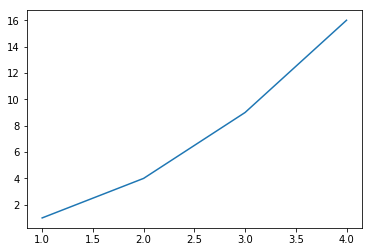

In [132]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

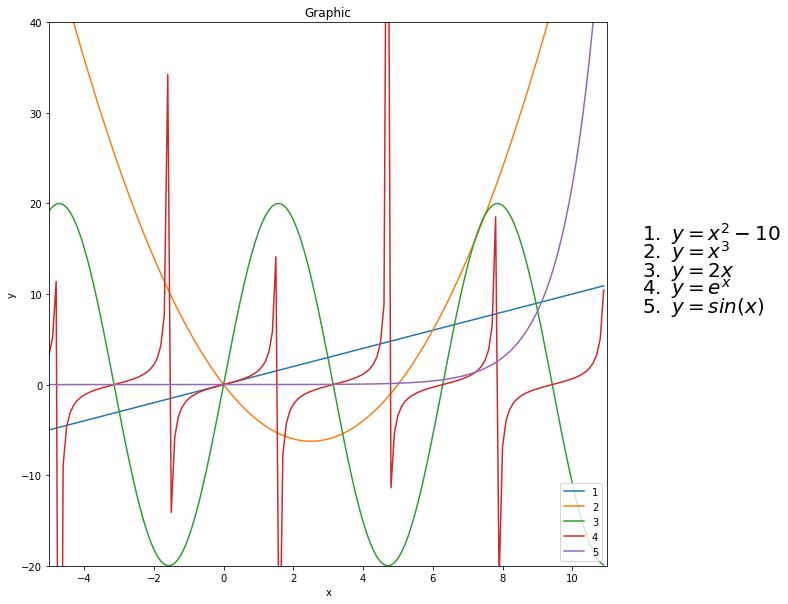

In [133]:
x = np.arange(-5, 11, 0.1)
y1 = x
y2 = -5 * x + x ** 2
y3 = np.sin(x) * 20
y4 = np.tan(x)
y5 = np.exp(x) / 1000

plt.figure(figsize=(10, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphic')
plt.xlim(-5, 11)
plt.ylim(-20, 40)

plt.text(12, 16, r'$1.\ y = x^2 - 10$', fontsize=20)
plt.text(12, 14, r'$2.\ y = x^3$', fontsize=20)
plt.text(12, 12, r'$3.\ y = 2x$', fontsize=20)
plt.text(12, 10, r'$4.\ y = e^x$', fontsize=20)
plt.text(12, 8, r'$5.\ y = sin(x)$', fontsize=20)

plt.plot(x, y1, label='1')
plt.plot(x, y2, label='2')
plt.plot(x, y3, label='3')
plt.plot(x, y4, label='4')
plt.plot(x, y5, label='5')
plt.legend(loc=4)
plt.show()

In [134]:
plt.savefig('figure.png')

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

## Все вместе (numpy + scipy + matplotlib)

In [135]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [136]:
np.random.seed(42)

In [137]:
np.random.RandomState(42)

In [138]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [139]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

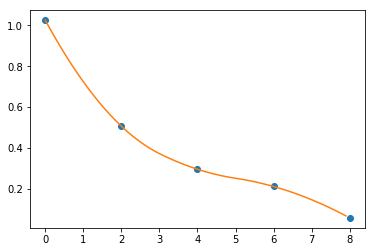

In [140]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

In [141]:
x_1 = np.linspace(-1, 1, 500)
y_1 = 2 * x_1 - 1 + np.random.normal(0, 0.1, 500)
x_2 = np.linspace(-1, 1, 100)
y_2 = 1 + np.random.normal(0, 0.1, 100)
x_sum = np.hstack((x_1, x_2))
y_sum = np.hstack((y_1, y_2))

<function matplotlib.pyplot.show>

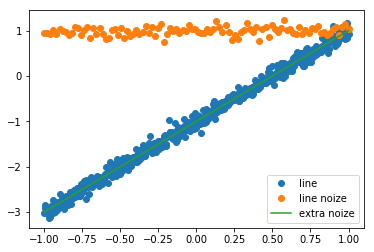

In [143]:
plt.plot(x_1, y_1, 'o', label='line')
plt.plot(x_2, y_2, 'o', label='line noize')
plt.plot(x_1, 2 * x_1 - 1, '-', label='extra noize')
plt.legend()
plt.show

In [144]:
x_res = np.hstack((x_1, x_2))
y_res = np.hstack((y_1, y_2))

In [145]:
def poly(xx, coeffs):
    return sum([coeffs[k] * xx ** k for k in range(len(coeffs))])

In [146]:
def lossf_square_500(coeffs):
    loss = sum((poly(x_1, coeffs) - y_1) ** 2)
    return loss

In [147]:
def lossf_square_600(coeffs):
    loss = sum((poly(x_res, coeffs) - y_res) ** 2)
    return loss

In [148]:
def lossf_abs_500(coeffs):
    loss = sum(abs(poly(x_1, coeffs) - y_1))
    return loss

In [153]:
def lossf_abs_600(coeffs):
    loss = sum(abs(poly(x_res, coeffs) - y_res))
    return loss

In [154]:
result_square = optimize.minimize(lossf_square_600, np.array([5,3]))
print result_square.x

[-0.66798886  1.67243003]


In [158]:
result_abs = optimize.minimize(lossf_abs_600, np.array([5,3]))
print result_abs.x

[-0.97548084  2.00033226]


In [159]:
y_res_square = result_square.x[0] + result_square.x[1] * x_res
y_res_abs = result_abs.x[0] + result_abs.x[1] * x_res

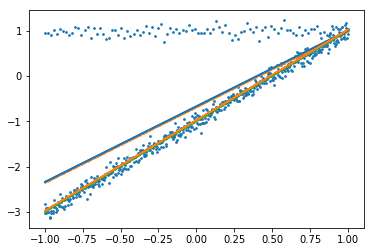

In [162]:
plt.scatter(x_res, y_res, s = 3)

plt.scatter(x_res, y_res_square, s = 1)
plt.scatter(x_res, y_res_abs, s = 1)

plt.plot(x_res, y_res_square)
plt.plot(x_res, y_res_abs)